<a href="https://colab.research.google.com/github/SamuelOliveira/Colab/blob/main/FT043_2021S1_T3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```
Author: Samuel Oliveira da Silva
RA: 231294
Email: s231294@g.unicamp.br
FT084_2021S1_T3
```

## **Enunciado**

**2**. Os dados fornecidos em anexo correspondem a um problema de classificação supervisionada no qual há um único atributo de entrada. Assumindo um modelo de pdf gaussiana para cada uma das classes:

*   **(a)** Trace os histogramas dos dados, utilizando cores diferentes para cada uma das classes.

*   **(b)** Obtenha o limiar de classificação considerando uma abordagem de classificação baseada na máxima verossimilhança.

*   **(c)** Calcule a probabilidade de erro (teórica) de classificação para cada uma das classes, bem como a probabilidade de erro total (considerando as duas classes) da abordagem de máxima verossimilhança.

*   **(d)** Calcule a taxa de erro (empírica) de classificação para cada uma das classes, bem como a taxa de erro total (considerando as duas classes) da abordagem de máxima verossimilhança. Compare com o resultado obtido no item **(c)**.

*   **(e)** Proponha um novo classificador que leve em conta o desbalanço entre as duas classes. Obtenha o limiar de classificação neste caso.

*   **(f)** Repita os itens **(d)**, porém agora considerando o limiar de classificação definido pela proposta do item **(e)**.

*   **(g)** Comente eventuais diferenças entre os desempenhos dos classificadores propostos nos itens **(b)** e **(e)**.


Observação: Para leitura dos dados em Python, é possível utilizar o código. A primeira coluna do array ‘Dados’ corresponde ao valor do atributo e a segunda coluna identifica a classe da amostra (0 ou 1) 
 
import numpy as np Dados = np.loadtxt('dados_atividade.csv', delimiter=',') 

## **Importando bibliotecas**

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import norm

# definindo função para Pontos de Intersecção das Classes, Limiar
def threshold(m1,m2,std1,std2):
  a = 1/(2*std1**2) - 1/(2*std2**2)
  b = m2/(std2**2) - m1/(std1**2)
  c = m1**2 /(2*std1**2) - m2**2 / (2*std2**2) - np.log(std2/std1)
  return np.roots([a,b,c])

## **Obtendo o Conjunto de Dados**

Informações adicionais em:
1.   [CoreDump.biz](https://pt.coredump.biz/questions/32551610/overlapping-probability-of-two-normal-distribution-with-scipy)
2.   [Tutoriels Tanagra](http://tutoriels-data-mining.blogspot.com/)
3.   [Ricco Rakotomalala, pdf](http://eric.univ-lyon2.fr/~ricco/tanagra/fichiers/en_Tanagra_Calcul_P_Value.pdf)

In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/SamuelOliveira/Colab/main/dados_atividade_02.csv')
data0 = df.loc[df.classe == 0]['atributo']
data1 = df.loc[df.classe == 1]['atributo']

## **Obtendo Estatistica Descritivas**

In [14]:
# obtendo estatisticas descritivas
data0_std = data0.std(axis=0)
data1_std = data1.std(axis=0)

# obtendo média por classes
data0_mean = data0.mean(axis=0)
data1_mean = data1.mean(axis=0)

# obtendo pontos de intersecção, Limiar de Classificação
data_lc = threshold(data0_mean,data1_mean,data0_std,data1_std)
data_threshold = [data_lc[1]]

## **Resoluções**

**a)** Trace os histogramas dos dados, utilizando cores diferentes para cada uma das classes

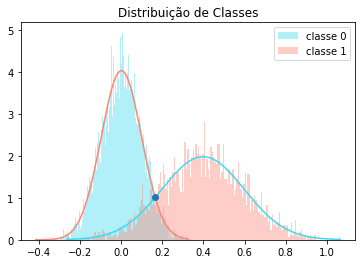

In [15]:
plt.title('Distribuição de Classes')

count_0, bins_0, ignored = plt.hist(data0, 200, alpha=0.4, label='classe 0', density=True, color='#3edbf0');
count_1, bins_1, ignored = plt.hist(data1, 200, alpha=0.4, label='classe 1', density=True, color='#ff8474');
plt.legend(loc='upper right')

plt.plot(bins_0,norm.pdf(bins_0, data0_mean, data0_std), color='#ff8474');
plt.plot(bins_1,norm.pdf(bins_1, data1_mean, data1_std), color='#3edbf0');

plt.plot(data_threshold,norm.pdf(data_threshold,data0_mean,data0_std),'o');

**b)** Obtenha o limiar de classificação considerando uma abordagem de classificação baseada na máxima verossimilhança.

In [16]:
print("Limiar de Classificação:", data_threshold)

Limiar de Classificação: [0.1643496088390746]


**(c)** Calcule a probabilidade de erro (teórica) de classificação para cada uma das classes, bem como a probabilidade de erro total (considerando as duas classes) da abordagem de máxima verossimilhança.

In [17]:
erro_theoretical_0 = 1 - norm.cdf(data_threshold, data0_mean, data0_std)
erro_theoretical_1 = norm.cdf(data_threshold, data1_mean, data1_std)

erro_theoretical_total = erro_theoretical_0 + erro_theoretical_1

print('% Erro teórico classe 0 : ', erro_theoretical_0 * 100)
print('% Erro teórico classe 1 : ', erro_theoretical_1 * 100)
print('% Erro teórico Total    : ', erro_theoretical_total * 100)

% Erro teórico classe 0 :  [4.80362767]
% Erro teórico classe 1 :  [12.26975932]
% Erro teórico Total    :  [17.07338699]


**(d)** Calcule a taxa de erro (empírica) de classificação para cada uma das classes, bem como a taxa de erro total (considerando as duas classes) da abordagem de máxima verossimilhança. Compare com o resultado obtido no item **(c)**.

In [18]:
y = df['classe'].values
x = df['atributo'].values

samples_total = df.shape[0]
y_pred = np.zeros(samples_total)

for i in range(1,samples_total):
  z = x[i]
  if z<data_threshold:
    y_pred[i] = 0
  else:
    y_pred[i] = 1

print('Taxa de erro empirico : ', round(sum(abs(y_pred-y)/samples_total),2))

Taxa de erro empirico :  0.07


**(e)** Proponha um novo classificador que leve em conta o desbalanço entre as duas classes. Obtenha o limiar de classificação neste caso.

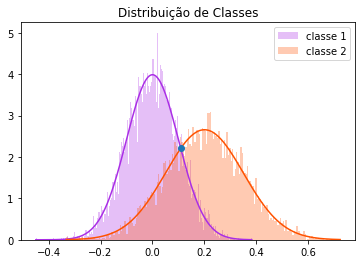

In [19]:
N_1 = 5000
N_2 = 7500
mu_1, sigma_1 = 0.0, 0.1
mu_2, sigma_2 = 0.2, 0.15
x1 = norm.rvs(mu_1, sigma_1, N_1)
x2 = norm.rvs(mu_2, sigma_2, N_2)

plt.title('Distribuição de Classes')
count_1, bins_1, ignored = plt.hist(x1, 200, alpha=0.3, label='classe 1', density=True, color='#aa2ee6');
count_2, bins_2, ignored = plt.hist(x2, 200, alpha=0.3, label='classe 2', density=True, color='#ff5200');
plt.legend(loc='upper right')

plt.plot(bins_1,norm.pdf(bins_1, mu_1, sigma_1), color='#aa2ee6');
plt.plot(bins_2,norm.pdf(bins_2, mu_2, sigma_2), color='#ff5200');

data_lc = threshold(mu_1,mu_2,sigma_1,sigma_2)
data_threshold_new = [data_lc[1]]

plt.plot(data_threshold_new,norm.pdf(data_threshold_new,mu_1,sigma_1),'o');

In [20]:
print("Limiar de Classificação:", data_threshold_new)

Limiar de Classificação: [0.1086945177927788]


**(f)** Repita os itens **(d)**, porém agora considerando o limiar de classificação definido pela proposta do item **(e)**.

In [23]:
for i in range(1,samples_total):
  z = x[i]
  if z<data_threshold_new:
    y_pred[i] = 0
  else:
    y_pred[i] = 1

print('Taxa de erro empirico : ', round(sum(abs(y_pred-y)/samples_total),2))

Taxa de erro empirico :  0.12


**(g)** Comente eventuais diferenças entre os desempenhos dos classificadores propostos nos itens **(b)** e **(e)**.

### **Observações:**

*   Com o maior desbalanceamento do conjunto de dados, ocorreu aumento na taxa de erro;
*   A plotagem demonstra que o novo classificador apresenta maior área de intersecção entre as classes tornando a classificação baseada na **máxima verossimilhança** um fator decisivo.